In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from prepare import handle_nulls
from preprocessing import create_features, split_df, spotify_split 
from preprocessing import scale_data, create_clusters

---
# Wrangle

In [2]:
df = pd.read_csv('full-playlist.csv', index_col=0)

In [3]:
df = create_features(handle_nulls(df))

In [4]:
df = df.dropna()

In [5]:
# change explicit column to int
df['explicit'] = df.explicit.astype('int')
df['is_featured_artist'] = df.is_featured_artist.astype('int')
df['disc_number'] = df.disc_number.astype('int')
df['mode'] = df['mode'].astype('int')
df['key'] = df.key.astype('int')
df['duration_seconds'] = df.duration_seconds.astype('int')
df['duration_minutes'] = df.duration_minutes.astype('int')
df['duration_ms'] = df.duration_ms.astype('int')
df['popularity'] = df.popularity.astype('int')
df['time_signature'] = df.time_signature.astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6073 entries, 0 to 6073
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist              6073 non-null   object 
 1   album               6073 non-null   object 
 2   release_date        6073 non-null   object 
 3   track_name          6073 non-null   object 
 4   track_id            6073 non-null   object 
 5   danceability        6073 non-null   float64
 6   energy              6073 non-null   float64
 7   key                 6073 non-null   int64  
 8   loudness            6073 non-null   float64
 9   mode                6073 non-null   int64  
 10  speechiness         6073 non-null   float64
 11  instrumentalness    6073 non-null   float64
 12  liveness            6073 non-null   float64
 13  valence             6073 non-null   float64
 14  tempo               6073 non-null   float64
 15  duration_ms         6073 non-null   int64  
 16  time_s

In [7]:
df.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
0,tay-k,trapman,2020-07-12,trapman,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,...,4,1,43,1,232,3,0,2020,07,12
1,lil wyte,doubt me now,2003-03-04,oxy cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,...,4,1,61,1,193,3,0,2003,03,04
2,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0,-6.450,0,...,4,1,22,1,254,4,0,2019,11,29
3,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0,-4.783,0,...,4,1,62,1,250,4,1,2010,10,01
4,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11,-5.470,0,...,4,1,45,1,261,4,1,2001,02,13


---
# Preprocessing

In [8]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')

Shape of train: (4250, 25) | Shape of validate: (912, 25) | Shape of test: (911, 25)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


In [9]:
bin_labels_5 = [1, 2, 3, 4, 5]
train['popularity_bin'] = pd.qcut(train['popularity'], q=5, precision=0, labels=bin_labels_5)

In [10]:
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day,popularity_bin
3072,allie x,cape god,2020-02-21,susie save your love,32tUYhAygMdx9XxFxxj3It,0.646,0.595,10,-6.709,0,...,0,62,1,238,3,0,2020,02,21,5
5674,vgo,suttin' special,2020-09-25,suttin' special,4fDgQUNG3851Wnc67aK1hO,0.839,0.335,9,-14.418,1,...,1,36,1,151,2,0,2020,09,25,3
4005,junglepussy,satisfaction guaranteed,2014-06-10,mi nuh care,2usnXvtQNyCNiOMZGOMYkB,0.517,0.903,10,-6.333,0,...,1,21,1,196,3,0,2014,06,10,2
1130,jack harlow,whats poppin,2020-01-21,whats poppin,3Q6F8RByyhRTJpRtZLY3cg,0.923,0.604,11,-6.671,0,...,1,18,1,139,2,0,2020,01,21,2
5441,bktherula,tweakin' together,2020-04-27,tweakin' together,6r639TM0j9JWM4jWJB1cVR,0.595,0.407,8,-11.978,1,...,1,59,1,126,2,0,2020,04,27,4


In [11]:
X_train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,duration_ms,time_signature,explicit,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
3072,allie x,cape god,2020-02-21,susie save your love,32tUYhAygMdx9XxFxxj3It,0.646,0.595,10,-6.709,0,...,238880,4,0,1,238,3,0,2020,02,21
5674,vgo,suttin' special,2020-09-25,suttin' special,4fDgQUNG3851Wnc67aK1hO,0.839,0.335,9,-14.418,1,...,151181,4,1,1,151,2,0,2020,09,25
4005,junglepussy,satisfaction guaranteed,2014-06-10,mi nuh care,2usnXvtQNyCNiOMZGOMYkB,0.517,0.903,10,-6.333,0,...,196338,4,1,1,196,3,0,2014,06,10
1130,jack harlow,whats poppin,2020-01-21,whats poppin,3Q6F8RByyhRTJpRtZLY3cg,0.923,0.604,11,-6.671,0,...,139741,4,1,1,139,2,0,2020,01,21
5441,bktherula,tweakin' together,2020-04-27,tweakin' together,6r639TM0j9JWM4jWJB1cVR,0.595,0.407,8,-11.978,1,...,126685,4,1,1,126,2,0,2020,04,27


In [12]:
X_train.columns.to_list()

['artist',
 'album',
 'release_date',
 'track_name',
 'track_id',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'explicit',
 'disc_number',
 'duration_seconds',
 'duration_minutes',
 'is_featured_artist',
 'release_year',
 'release_month',
 'release_day']

In [26]:
train.popularity_bin = train.popularity_bin.astype('object')

In [27]:
train_use = train.drop(columns=['artist', 'album', 'release_date', 'track_name', 'track_id',
 'duration_seconds', 'duration_minutes', 'release_year', 'release_month', 'release_day'])

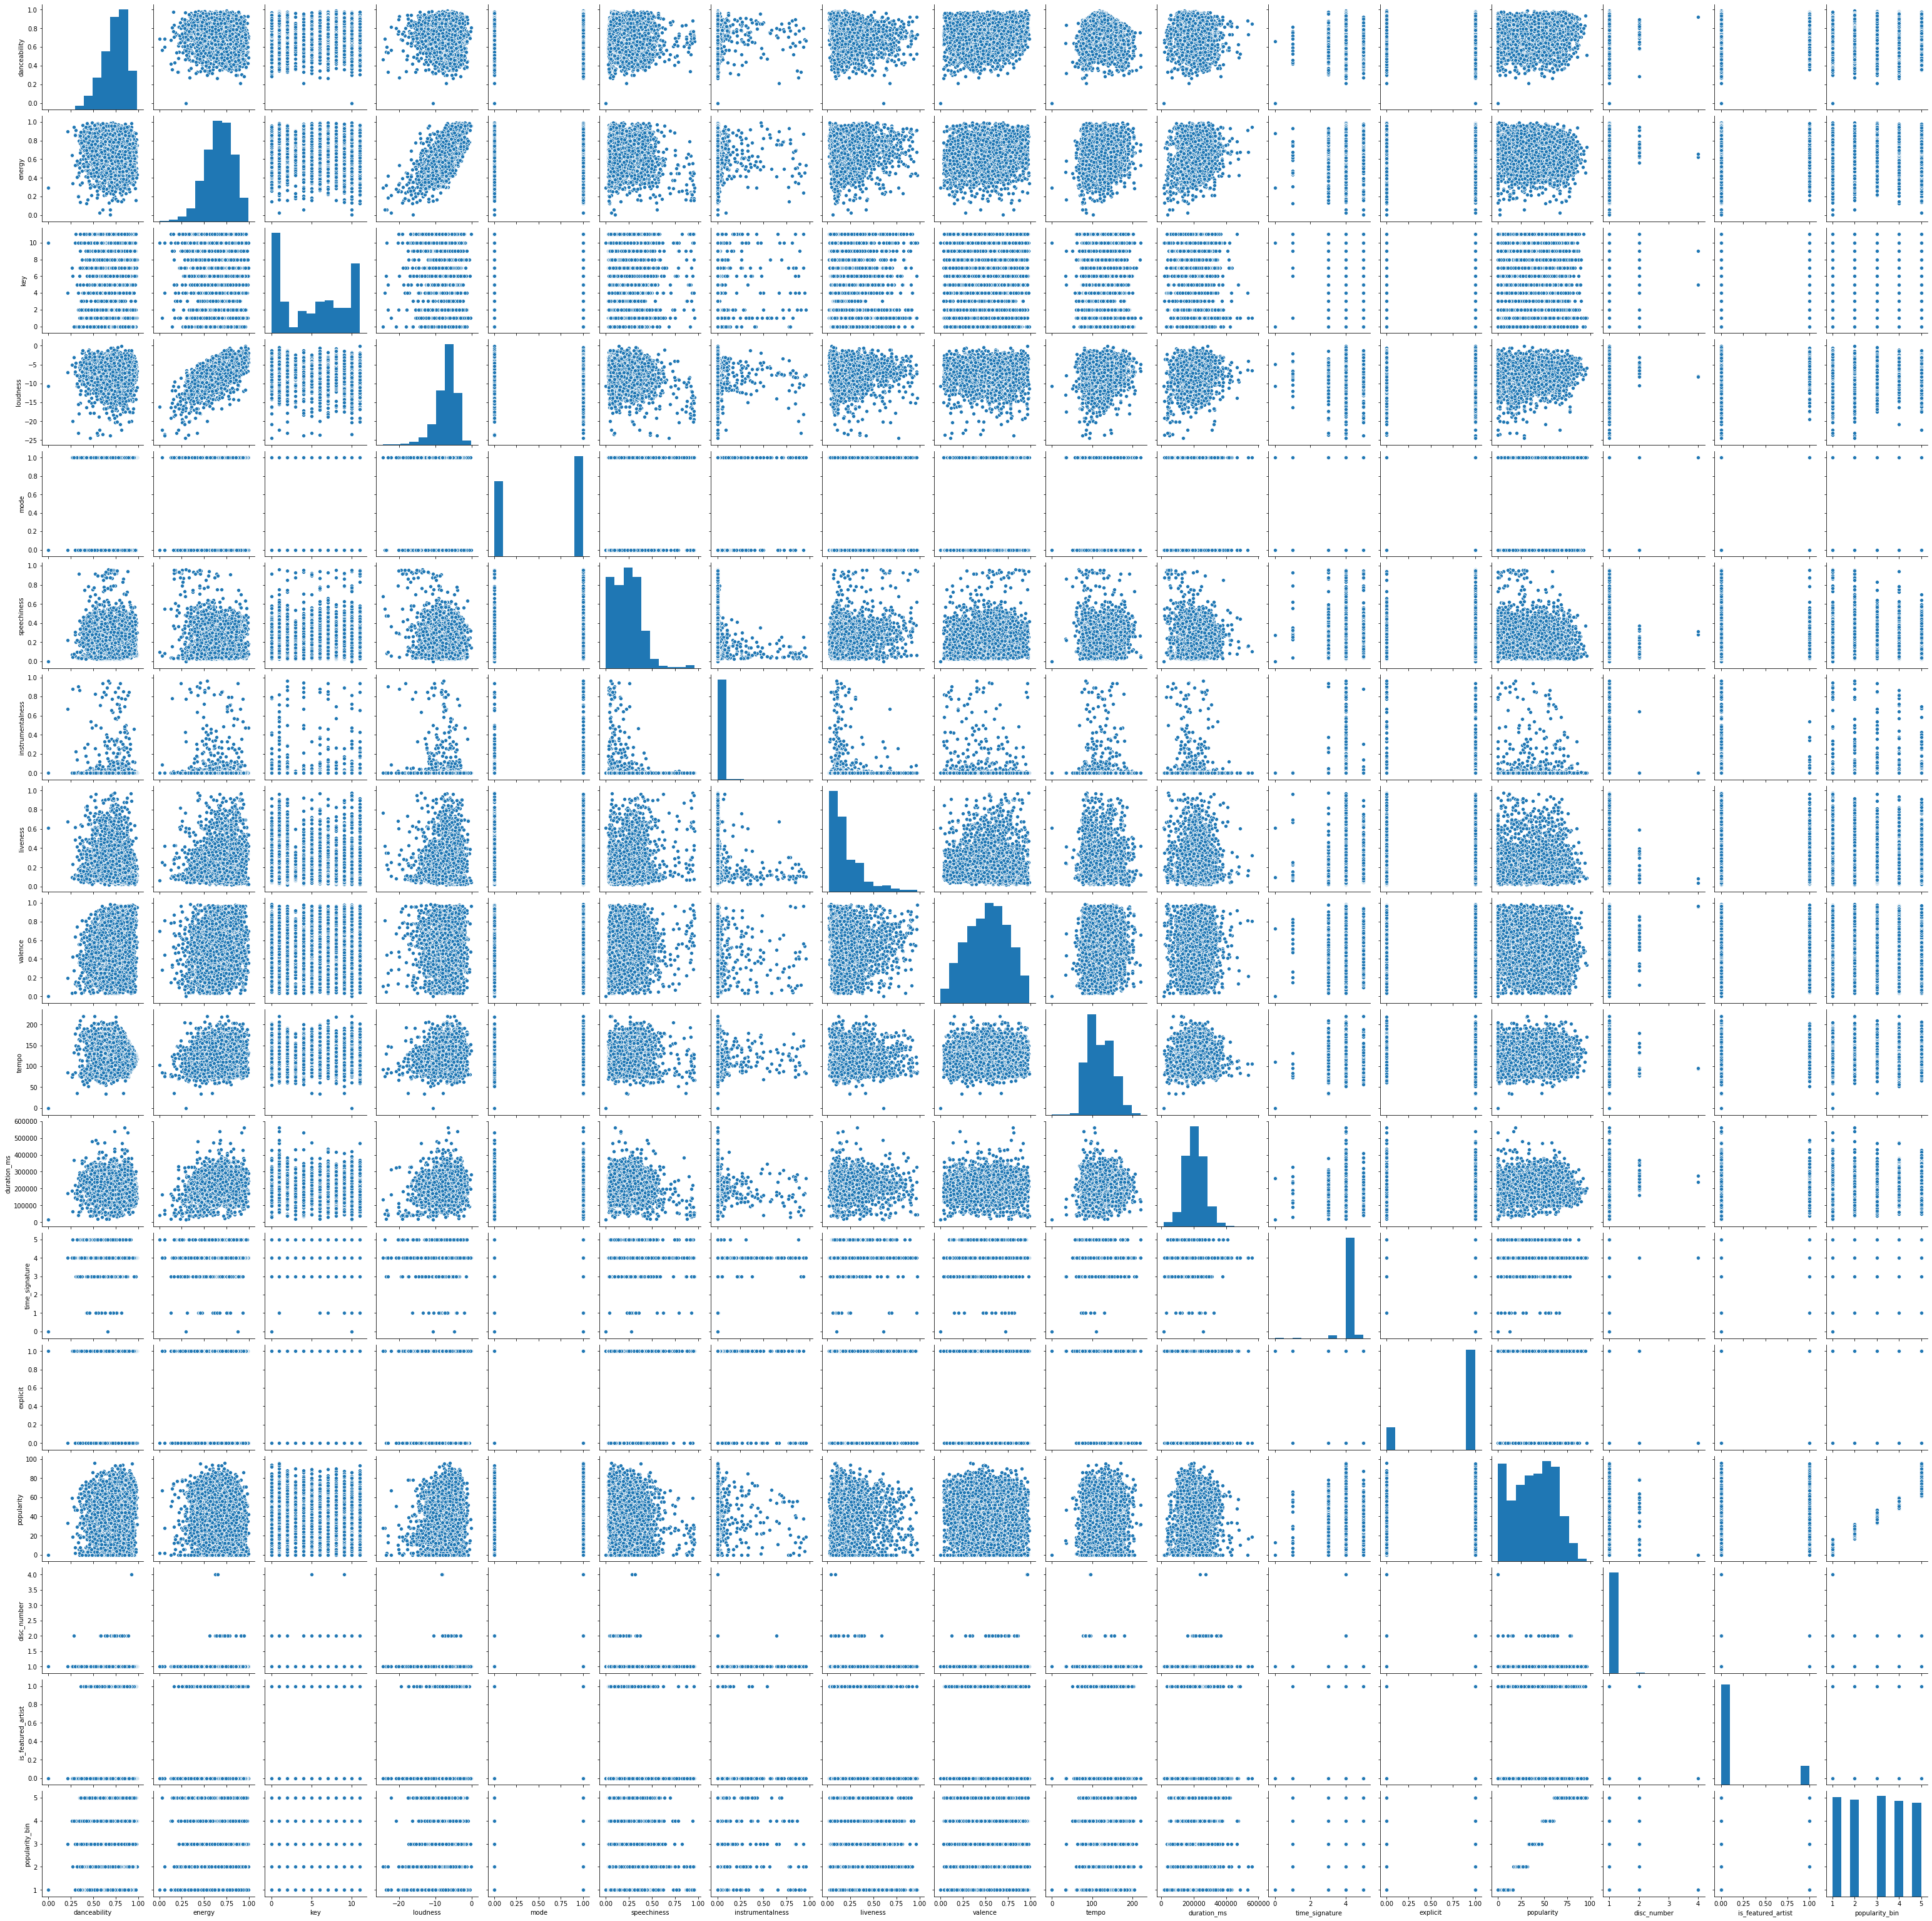

In [29]:
sns.pairplot(train_use)

--- 
# Clustering

In [ ]:
X = train[['valence', 'popularity']]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

In [ ]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.valence, subset.popularity, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='popularity', x='valence', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('valence')
plt.ylabel('popularity')
plt.title('Visualizing Cluster Centers')